In [1]:
## https://www.youtube.com/watch?v=JoR5HCs0n0s
##
## Using a simple autoencoder architcture to begin with on the BAT157 mo dataset


In [2]:
import tensorflow as tf  
from tensorflow import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
## Big array file
dir='/Users/acucchiara/COM/proposal/SRP2021/work/'

##
b157file='BAT150_sim10_wl6_bl_5.npz'

In [10]:
#Reade the array
bat157=np.load(dir+b157file)
bat157.files
images, labels=bat157['image'],bat157['labels']

In [38]:
print((images[:]/0.0487).min())

-0.1297691960452712


In [13]:
encoder_input = keras.Input(shape=(8, 155, 1), name='bat')

In [143]:
#flattening the data and creating the bottleneck
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(20, activation="relu")(x)

In [144]:
encoder = keras.Model(encoder_input, encoder_output, name='encoder')


In [145]:
decoder_input = keras.layers.Dense(20, activation="relu")(encoder_output)
x = keras.layers.Dense(1240, activation="relu")(decoder_input)  # 1240 is 8*155 features

In [146]:
155*8

1240

In [147]:
decoder_output = keras.layers.Reshape((8, 155, 1))(x)

In [148]:
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bat (InputLayer)             [(None, 8, 155, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1240)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 20)                24820     
_________________________________________________________________
dense_11 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_12 (Dense)             (None, 1240)              26040     
_________________________________________________________________
reshape_4 (Reshape)          (None, 8, 155, 1)         0         
Total params: 51,280
Trainable params: 51,280
Non-trainable params: 0
___________________________________________________

In [149]:
#We'll now compile our model with the optimizer and a loss metric. 
#We'll use mean squared error for loss (mse).
# https://keras.io/api/losses/   for more loss functions
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
autoencoder.compile(opt, loss='mse',)

In [150]:
epochs=5

for epoch in range(epochs):

    history = autoencoder.fit(
      images/0.0487,
      images/0.0487,
      epochs=4, 
      batch_size=32, validation_split=0.10
        )   
    autoencoder.save(f"models/AE-{epoch+1}.model")

Epoch 1/4
435/435 [==============================] - 1s 2ms/step - loss: 4.8478e-05 - val_loss: 3.2825e-07
Epoch 2/4
435/435 [==============================] - 1s 1ms/step - loss: 3.7770e-05 - val_loss: 3.2449e-07
Epoch 3/4
435/435 [==============================] - 1s 1ms/step - loss: 3.2573e-05 - val_loss: 3.1738e-07
Epoch 4/4
435/435 [==============================] - 1s 1ms/step - loss: 3.3045e-05 - val_loss: 3.2491e-07
INFO:tensorflow:Assets written to: models/AE-1.model/assets
Epoch 1/4
435/435 [==============================] - 1s 1ms/step - loss: 3.0112e-05 - val_loss: 3.2903e-07
Epoch 2/4
435/435 [==============================] - 1s 1ms/step - loss: 3.1362e-05 - val_loss: 3.2249e-07
Epoch 3/4
435/435 [==============================] - 1s 1ms/step - loss: 2.9399e-05 - val_loss: 3.2496e-07
Epoch 4/4
435/435 [==============================] - 1s 1ms/step - loss: 3.0370e-05 - val_loss: 3.2765e-07
INFO:tensorflow:Assets written to: models/AE-2.model/assets
Epoch 1/4
435/435 [=====

In [134]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


In [135]:
# First, let's look at an encoded example, because it's cool:
example = encoder.predict([images[0].reshape(-1, 8, 155, 1)] )
print(example.shape)

(1, 50)


(50,)
[0.03825222 0.         0.05131484 0.         0.         0.
 0.         0.         0.04366006 0.01554061 0.         0.
 0.         0.06293763 0.02478426 0.         0.04863582 0.
 0.         0.         0.37470555 0.03252885 0.         0.
 0.         0.         0.03096338 0.         0.         0.
 0.         0.         0.04247659 0.         0.03688449 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00914979]


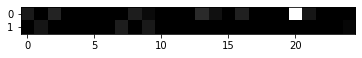

In [136]:
print(example[0].shape)
print(example[0])
plt.imshow(example[0].reshape((2,25)), cmap="gray")

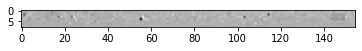

In [137]:
#That object was:
plt.imshow(images[0]*0.0487, cmap="gray")

[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


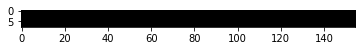

In [138]:
# AFTER THE AUTOENCODER IT WAS:
ae_out = autoencoder.predict([ images[1].reshape(-1, 8, 155, 1) ])
img = ae_out[0]  # predict is done on a vector, and returns a vector, even if its just 1 element, so we still need to grab the 0th
plt.imshow(ae_out[0]/0.0487, cmap="gray")
print(ae_out[0])

In [139]:
#Using OpenCV, we can quickly cycle through a bunch of 
#examples by doing:

for d in images[:5]:  # just show 5 examples, feel free to show all or however many you want!

    ae_out = autoencoder.predict([ d.reshape(-1, 8, 155, 1) ])
    img = ae_out[0]

    cv2.imshow("decoded",img )
    cv2.imshow("original",np.array(d))
    cv2.waitKey(1000)  # wait 1000ms, 1 second, and then show the next.

In [69]:
## Following the suggestion of Peter Harrington:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [118]:
# prepare the predicted images from the encoder portion
X=[]

for im in images:
    val=encoder.predict(im.reshape(-1, 8, 155, 1) )
    #print(val.shape)
    X.append(val[0])

In [119]:
print(np.array(X[0:2]))


[[0.         0.         0.07632875 0.         0.         0.
  0.         0.         0.07497109 0.15977375 0.         0.
  0.         0.21994528 0.         0.         0.08159518 0.
  0.         0.         0.35699314 0.04200723 0.         0.
  0.         0.         0.00399086 0.         0.         0.
  0.         0.05970611 0.01959756 0.         0.02944804 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.0761209  0.         0.         0.
  0.         0.         0.07511173 0.16012155 0.         0.
  0.         0.21992758 0.         0.         0.08120699 0.
  0.         0.         0.3569238  0.04217125 0.         0.
  0.         0.         0.00393685 0.         0.         0.
  0.         0.05955221 0.01926135 0.         0.02957396 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.

In [120]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), labels, test_size=0.3)
print(X_train.shape)

(10822, 50)


In [127]:
neigh = KNeighborsClassifier(n_neighbors=30)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [129]:
print(neigh.predict([X_test[3]]))
print(y_test[1:10])

[1]
[ 1  1  1  2 20  1  1  1 25]
